In [1]:
# WEEK 20 - HOMEWORK SOLUTIONS
# https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016  

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfs = pd.read_csv('master.csv')
dfs

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
## Explanation of Features
# Country : Name of the country.
# year : year of suicide (1985 - 2016)
# sex : gender (male / female)
# age : 15-24 years/25-34 years/35-54 years/5-14 years/55-74 years/75+ years
# suicides_no : the raw number of reported suicides
# population : country population
# suicides_100k : suicides_no * 100k / population
# gdp_for_year : total monetary or market value of all final goods and services produced in a country in a given year
# gdp_per_capita : the ratio of real GDP to the average population of a specific year
# generation : Boomers / G.I.Generation / Generation X / Generation Y / Millenials / Silent

In [4]:
dfs.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
dfs.rename(columns={"suicides/100k pop": "sui100"},inplace=True) 

In [7]:

dfs.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
sui100                    0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

# Global Suicides(per 100K)-trend over time 1985-2016

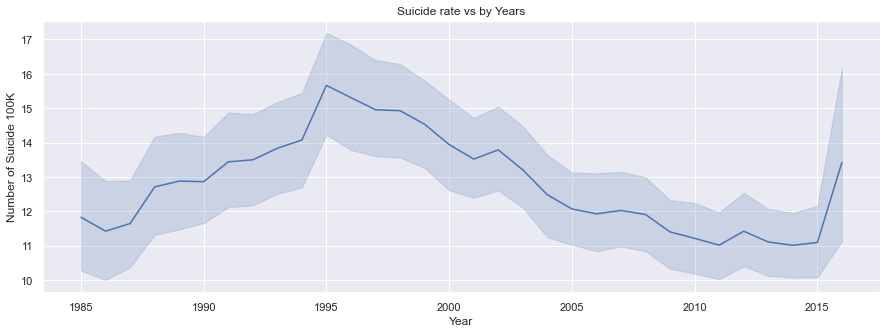

In [8]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.lineplot(x="year",y='sui100', palette = "Set3",data=dfs)
plt.xlabel("Year")
plt.ylabel("Number of Suicide 100K")
plt.title("Suicide rate vs by Years")
plt.show()

## Global Suicides(per 100K) by Continent

## Global Suicides(per 100k) by Gender and trend over time 1985-2016

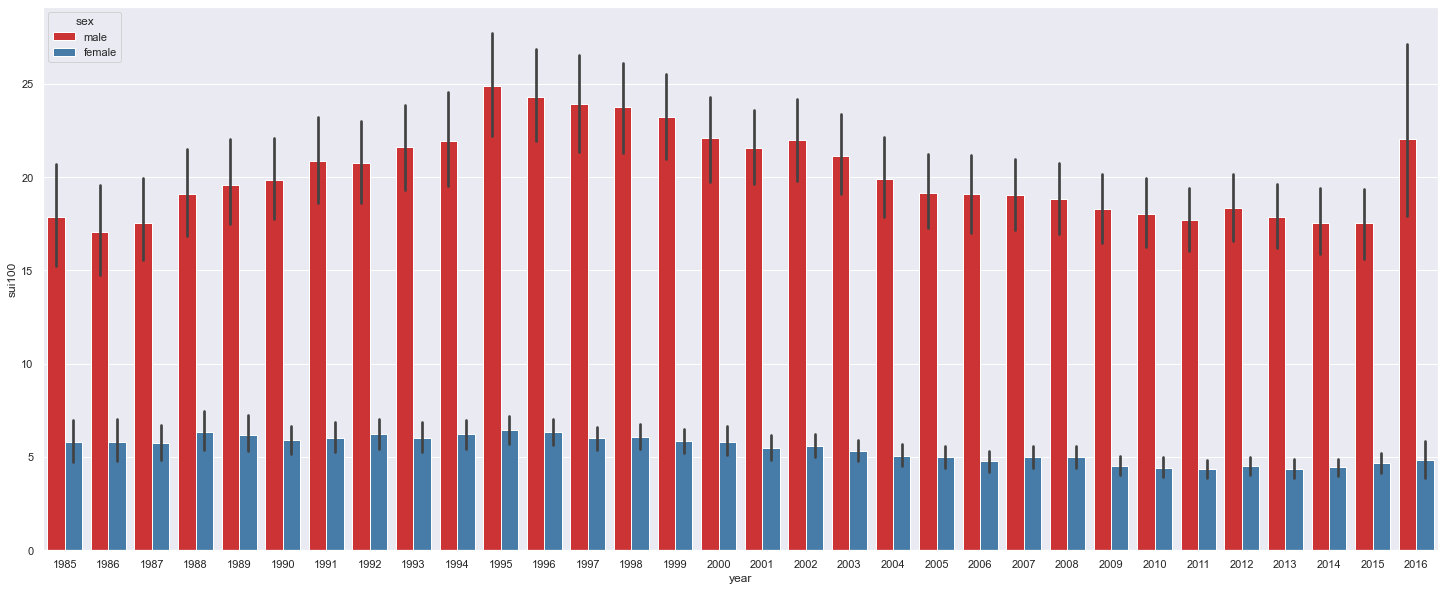

In [9]:
plt.figure(figsize=(25,10))
#sns.barplot(x="sex",y='sui100',data=dfs)
sns.barplot(x='year',y='sui100',data=dfs, palette = "Set1",hue='sex')

plt.show()

## Generation hue Gender Counter

Text(0.5, 1.0, 'Gender vs Suicides')

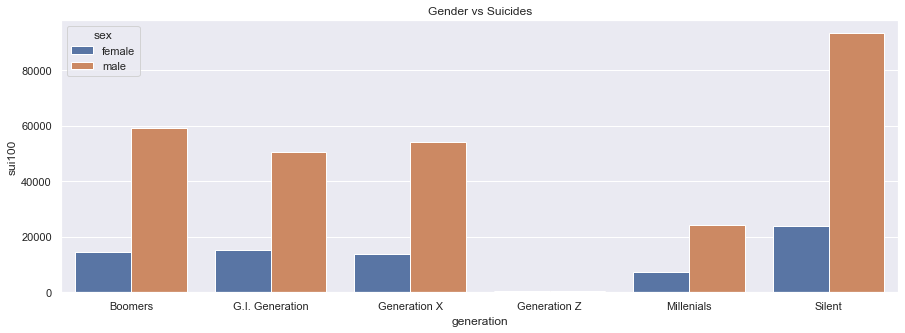

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x = "generation", y = "sui100", hue = "sex",data = dfs.groupby(["generation","sex"]).sum().reset_index()).set_title("Gender vs Suicides")

## Which age of people suicide a most

Text(0.5, 1.0, 'Which age of people suicide a most?')

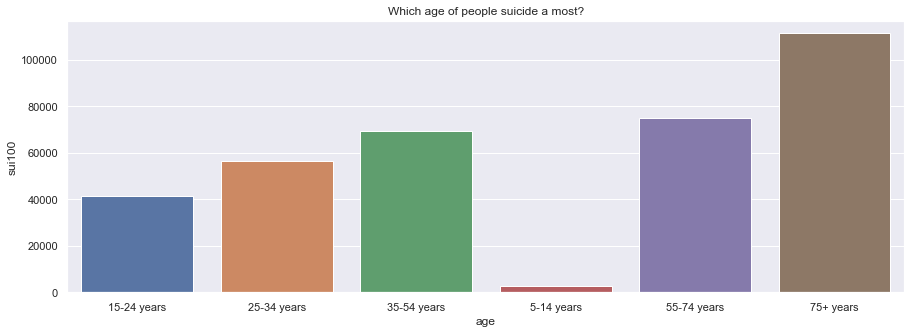

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x = "age", y = "sui100", data = dfs.groupby(["age"]).sum().reset_index()).set_title("Which age of people suicide a most?")

## Which generation of people suicide a most

Text(0.5, 1.0, 'Which age of people suicide a most?')

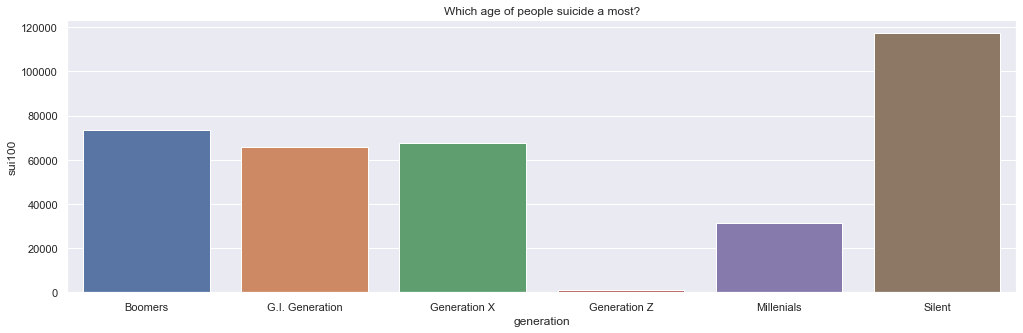

In [12]:

plt.figure(figsize=(17,5))
sns.barplot(x = "generation", y = "sui100", data = dfs.groupby(["generation"]).sum().reset_index()).set_title("Which age of people suicide a most?")